In [1]:
%matplotlib notebook
import numpy as np
import itertools
import logging

from config import CFG
from dataset import load_and_prepare_data
from kde_classes import Model, KDE

from models.multi_gaussian import settings, grid

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

from numpy.lib import recfunctions as np_rfn

# Logging setup utilities
from debugging import (
    setup_logger,
    setup_console_handler,
    setup_file_handler
)

Welcome to JupyROOT 6.14/04


In [2]:
setup_logger('KDE', logging.DEBUG)
log_format = '%(asctime)s %(processName)s %(name)s %(levelname)s: '\
             '%(message)s'
setup_console_handler('KDE', logging.DEBUG, log_format)

In [3]:
mg = np.load(CFG['paths']['mg_mc'])
model = Model(mg, settings, weighting=None)

2019-07-08 18:32:34,209 MainProcess KDE.kde_classes.Model INFO: Using ones as weight.


In [4]:
kde = KDE(model)

                   y INFO: Creating 1D phase space in range (-5.000000, 5.000000)
                   x INFO: Creating 1D phase space in range (-5.000000, 5.000000)
        PhspCombined INFO: Creating combined phase space of 2 components
        PhspCombined INFO: Adding component phase space "y", dim=1
        PhspCombined INFO: Adding component phase space "x", dim=1
        PhspCombined INFO: Resulting dimensionality is 2


In [5]:
binned_kernel_density = kde.generate_binned_kd([0.5, 0.5])

 BinnedKernelDensity INFO: Creating binned kernel density over 2D phase space
 BinnedKernelDensity INFO: Map size=10000
 BinnedKernelDensity INFO: Using variable "weight" as weight
 BinnedKernelDensity INFO: Will read 10000 events (skipping first 0)
 BinnedKernelDensity INFO: Will read branch "y" from tree "tree"
 BinnedKernelDensity INFO: Will read branch "x" from tree "tree"
 BinnedKernelDensity INFO: Will read branch "weight" from tree "tree"
 BinnedKernelDensity INFO: 9841 events read in from "tree", 159 out
 BinnedKernelDensity INFO: Will use uniform density for approximation
 BinnedKernelDensity INFO: Convolution of approx. density using rectangular grid
 BinnedKernelDensity INFO: Normalising density
 BinnedKernelDensity INFO: Average PDF value before normalisation is 0.989048


In [6]:
out_bins = []
for key in settings:
    out_bins.append(np.linspace(settings[key]['range'][0],
                                settings[key]['range'][1],
                                settings[key]['nbins']))
coords = np.array(list(itertools.product(*out_bins)))

In [7]:
print('Evaluate KDEs:')
pdf_vals = np.asarray([kde.eval_point(binned_kernel_density, coord) for coord in coords])
nbins = 100
shape = np.ones(len(model.vars), dtype=int)*nbins
pdf_vals = pdf_vals.reshape(*shape)
#pdf_vals = pdf_vals.reshape(model.nbins)

Evaluate KDEs:
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=-1.363636, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=-0.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=1.000000
 BinnedKernelDensity WARNING: dim 1: x=1.969697, weight=-0.00

In [8]:
X, Y = np.meshgrid(*out_bins)

<IPython.core.display.Javascript object>


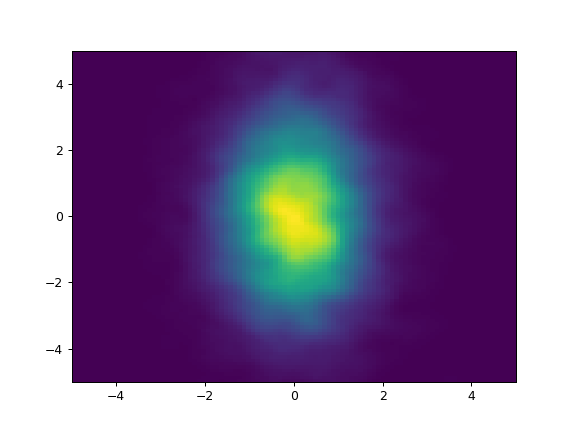

In [9]:
plt.figure()

plt.pcolormesh(X, Y, pdf_vals)

<IPython.core.display.Javascript object>


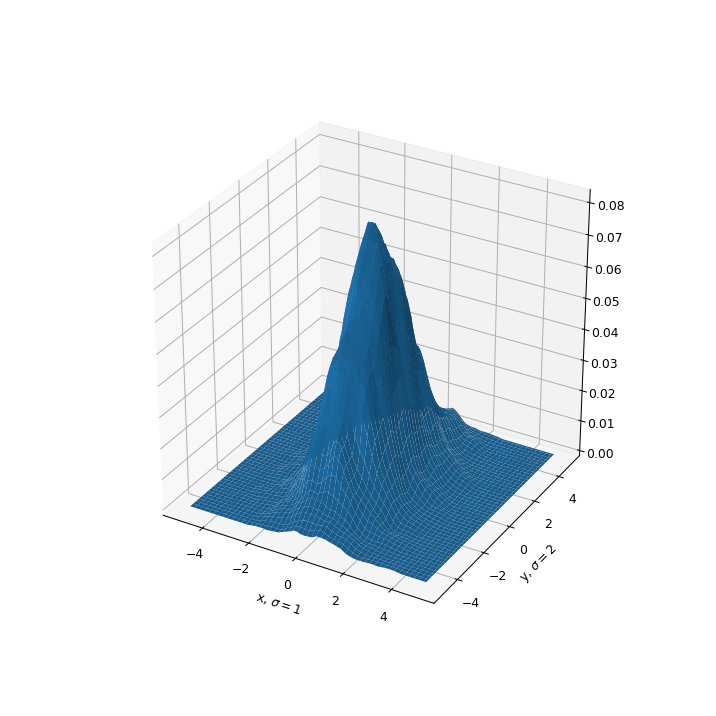

Text(0.5,0,'y, $\\sigma=2$')

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, pdf_vals)
ax.set_xlabel('x, $\sigma=1$')
ax.set_ylabel('y, $\sigma=2$')

Generate adaptive kde

In [12]:
adaptive_kernel_density = kde.generate_adaptive_kd([0.5, 0.5])

 BinnedKernelDensity INFO: Creating binned kernel density over 2D phase space
 BinnedKernelDensity INFO: Map size=10000
 BinnedKernelDensity INFO: Using variable "weight" as weight
 BinnedKernelDensity INFO: Will read 10000 events (skipping first 0)
 BinnedKernelDensity INFO: Will read branch "y" from tree "tree"
 BinnedKernelDensity INFO: Will read branch "x" from tree "tree"
 BinnedKernelDensity INFO: Will read branch "weight" from tree "tree"
 BinnedKernelDensity INFO: 9841 events read in from "tree", 159 out
 BinnedKernelDensity INFO: Will use uniform density for approximation
 BinnedKernelDensity INFO: Convolution of approx. density using rectangular grid
 BinnedKernelDensity INFO: Normalising density
 BinnedKernelDensity INFO: Average PDF value before normalisation is 0.989048
AdaptiveKernelDensit INFO: Creating binned adaptive kernel density over 2D phase space
AdaptiveKernelDensit INFO: Map size=10000
AdaptiveKernelDensit INFO: Using variable "weight" as weight
AdaptiveKernelDe

In [ ]:
nbins = 100

print('Evaluate KDEs:')
adaptive_pdf_vals = np.asarray([kde.eval_point(adaptive_kernel_density, coord) for coord in coords])
shape = np.ones(len(settings.keys()), dtype=int)*nbins
adaptive_pdf_vals = adaptive_pdf_vals.reshape(*shape)

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, adaptive_pdf_vals)
ax.set_xlabel('x, $\sigma=1$')
ax.set_ylabel('y, $\sigma=2$')

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
h = ax.hist2d(mg['x'], mg['y'], bins=[100, 100], range=[[-5, 5], [-5, 5]])
fig.colorbar(h[3], ax=ax)


In [ ]:
llh, zeros = kde.cross_validate([0.5, 0.5])

In [ ]:
result = kde.cross_validate_bandwidths()

In [ ]:
result

In [ ]:
settings = {
    'x': {
        'mc_var': 'x',
        'function': "mg['x']",
        'bandwidth': np.linspace(0.1, 1, 10),
        'nbins': 100,
        'range': [-5, 5]
        },
    'y': {
        'mc_var': 'y',
        'function': None,
        'bandwidth': [0.3, 0.4, 0.5, 0.6],
        'nbins': 100,
        'range': [-5, 5]
        }
}

In [ ]:
eval(settings['x']['function'])

In [ ]:
try:
    eval(settings['y']['function'])
except SyntaxError:
    print('Exception')

In [ ]:
if callable(self.model.functions[i]):
    mc_values = self.model.functions[i](mc[self.model.mc_vars[i]])
else:
    mc_values = mc[self.model.mc_vars[i]]
